In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches

from skimage.io import imread, imsave
from skimage.color import label2rgb

import torch

In [2]:
name = 'BonnerTagesblatPred'

In [3]:
plt.rcParams["figure.figsize"] = (30,20)
plt.rcParams["font.size"] = 15
plt.rcParams['savefig.pad_inches'] = 0

In [4]:
cmap_17 = torch.tensor([[161.,203,242],
                        [227,88,34],
                        [247,167,0], 
                        [100,68,34],
                        [243,195,0], 
                        [137,44,22],
                        [219,210,0],
                        [179,68,108],
                        [41,183,0],
                        [96,78,151],
                        [249,147,120],
                        [0,103,166],
                        [230,143,172],
                        [0,136,85],
                        [132,132,130],
                        [195,179,129],
                        [191,0,50]])/255. 

In [5]:
cmap = reversed([cm.get_cmap('gist_rainbow', 10)(i)[:3] for i in range(10)])
print(cmap)

In [6]:
cmap = [(1.0, 0.0, 0.16), (1.0, 0.43843843843843844, 0.0), (0, 0.222, 0.222), (0.36036036036036045, 0.5, 0.5), (0.0, 1.0, 0.2389486260454002), (0.8363201911589008, 1.0, 0.0), (0.0, 0.5615942028985507, 1.0), (0.0422705314009658, 0.0, 1.0), (0.6461352657004831, 0.0, 1.0), (1.0, 0.0, 0.75)]

In [7]:
img = torch.load(f"{name}.pt").numpy() * 10
img[-1][-1] = 1
print((img).max())
print(img.min())

unique, counts = np.unique(img, return_counts=True)
print(dict(zip(unique, counts)))

9.0
0.0
{0.0: 11431510, 1.0: 26, 2.0: 162618, 3.0: 203386, 4.0: 16104003, 5.0: 1309370, 6.0: 258583, 7.0: 117787, 8.0: 58856, 9.0: 162501}


In [8]:
values = ["UnknownRegion", "caption", "table", "article", "heading", "header", "separator (vertical)",
          "separator (short)", "separator (horizontal)"]

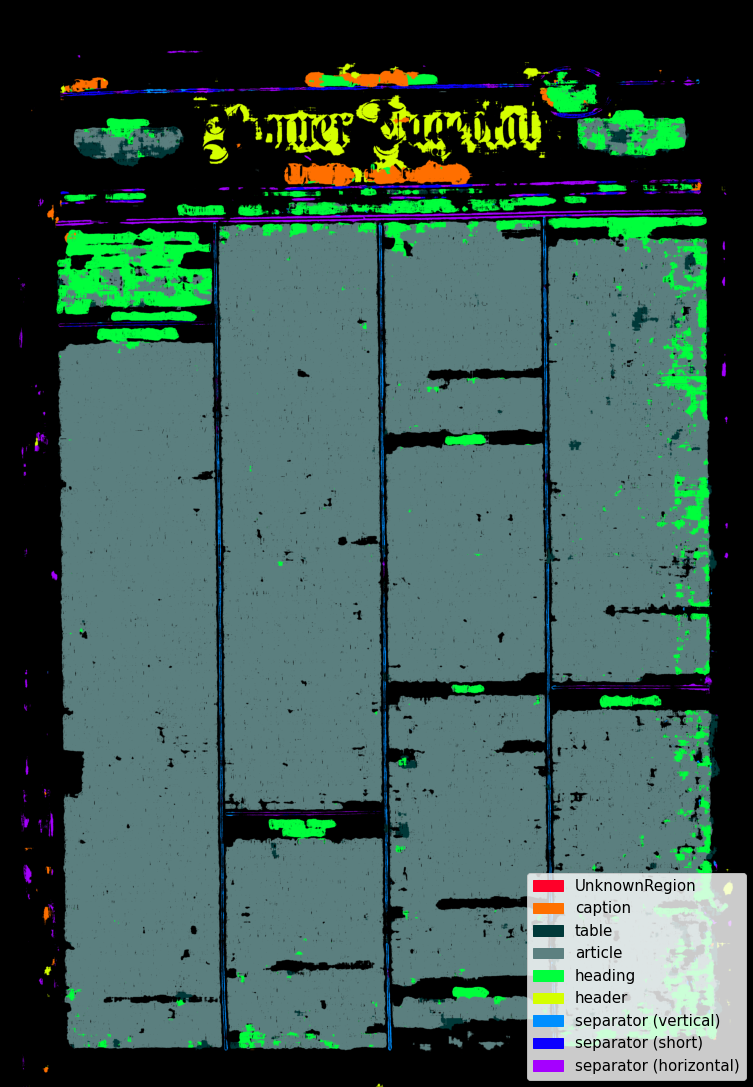

In [9]:
plt.imshow(label2rgb(img, bg_label=0, colors=cmap))
plt.axis('off')

# create a patch (proxy artist) for every color 
patches = [ mpatches.Patch(color=cmap[i], label=f"{values[i]}" ) for i in range(9) ]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, loc=4)

plt.autoscale(tight=True)

plt.savefig(f"color_{name}.png", bbox_inches=0, pad_inches=0)

plt.show()